In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob
import torch
print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Using torch 2.2.0 (CPU)


In [12]:
images_path = '/Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/JPEGImages/'
annotations_path  = '/Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/Annotations_txt/'
path = '/Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/'
from ultralytics import YOLO

# load pre-trained model
detection_model = YOLO("yolov8n.pt")

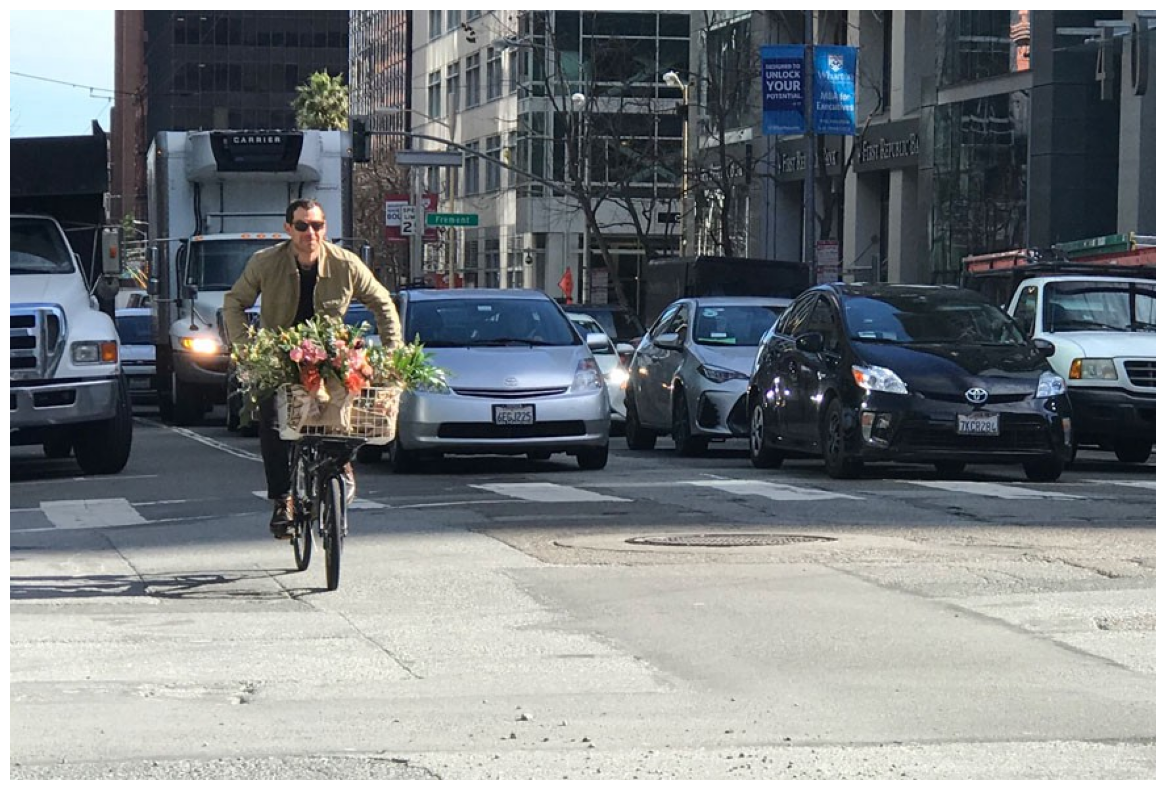

In [16]:
img = random.choice(os.listdir(images_path))


im = plt.imread('/Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/GRdCC.jpg')
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(im)


In [17]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Convert bounding box coordinates from YOLO format to OpenCV format
def convert(size, x, y, w, h):
    box = np.zeros(4)
    dw = 1. / size[0]
    dh = 1. / size[1]
    x = x / dw
    w = w / dw
    y = y / dh
    h = h / dh
    box[0] = x - (w / 2.0)
    box[1] = x + (w / 2.0)
    box[2] = y - (h / 2.0)
    box[3] = y + (h / 2.0)
    return box

# Function to plot annotations on the image
def plot_annotations(img, filename):
    with open(annotations_path + filename, 'r') as f:
        for line in f:
            value = line.split()
            cls = int(value[0])
            x = float(value[1])
            y = float(value[2])
            w = float(value[3])
            h = float(value[4])
            
            img_h, img_w = img.shape[:2]
            bb = convert((img_w, img_h), x, y, w, h)
            # Draw bounding box on the writable copy of the image
            cv2.rectangle(img, 
                          (int(round(bb[0])), int(round(bb[2]))), 
                          (int(round(bb[1])), int(round(bb[3]))), 
                          (255, 0, 0), 2)

    plt.axis('off')
    plt.imshow(img)


# Plot images with annotations
plt.figure(figsize=(20, 12))
ls = os.listdir(images_path)
c = 1
for i in random.sample(ls, 10):
    try:
        # Load the image and make it writable by using np.copy()
        img = np.copy(plt.imread(images_path + i))
        
        # Generate the corresponding annotation file name
        annotation_file = i.rstrip('.jpg') + '.txt'
        
        # Plot the image with annotations
        plt.subplot(2, 5, c)
        plot_annotations(img, annotation_file)
        
        # Increment the counter
        c += 1
        
    except Exception as e:
        print(f"Error processing {i}: {e}")
        continue

plt.show()


In [18]:
train = []
with open(path+'ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        train.append(line)

test = []
with open(path+'ImageSets/Main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        test.append(line)

In [24]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')

FileExistsError: [Errno 17] File exists: 'train'

In [25]:
train_path = '/Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/train/'
test_path = '/Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/test/'

print('Copying Train Data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(images_path+i+'.jpg', train_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', train_path+'labels/'+i+'.txt')

print('Copying Test Data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(images_path+i+'.jpg', test_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', test_path+'labels/'+i+'.txt')


Copying Train Data..!!


  3%|█▏                                     | 66/2145 [04:08<2:10:33,  3.77s/it]


KeyboardInterrupt: 

In [43]:
text = """
train: /Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/train
val: /Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/test

# number of classes
nc: 10

# class names
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(text)

In [44]:
model = YOLO("yolov8n.pt")
if torch.cuda.is_available():
    model = model.to('cuda')
    print(f"Training on {torch.cuda.get_device_name(0)}")
else:
    print("Training on CPU")

model = model.to(device)


model.train(data='data.yaml', epochs=5,          # Image size
    batch=8,           # Batch size
      # Save the model during training
    cache=True    )


Training on CPU
New https://pypi.org/project/ultralytics/8.2.88 available 😃 Update with 'pip install -U ultralytics'
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=True, device=cpu, workers=8, project=None, name=train17, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

train: Scanning /Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_det
train: Caching images (1.6GB RAM): 100%|██████████| 2145/2145 [00:00<00:00, 2497
val: Scanning /Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detec
val: Caching images (0.4GB RAM): 100%|██████████| 537/537 [00:00<00:00, 1732.96i


Plotting labels to runs/detect/train17/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train17
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.275       2.47      1.337         11        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        537       2035      0.586      0.575      0.522      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.043       1.27      1.159         12        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        537       2035       0.55      0.653       0.61      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.9289      1.058        1.1          7        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        537       2035      0.639      0.645       0.65      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G     0.8343     0.9188      1.054         10        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        537       2035      0.576       0.67      0.657      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      0.757      0.818      1.018         11        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        537       2035      0.656      0.667       0.69      0.435



5 epochs completed in 0.704 hours.
Optimizer stripped from runs/detect/train17/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train17/weights/best.pt, 6.2MB

Validating runs/detect/train17/weights/best.pt...
Ultralytics YOLOv8.2.79 🚀 Python-3.12.4 torch-2.4.0 CPU (Apple M2)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        537       2035      0.656      0.667       0.69      0.435
              sunglass         82         82      0.195     0.0122      0.101     0.0298
                   hat         77         77       0.71      0.584      0.655      0.334
                jacket        179        181      0.687      0.826      0.805      0.585
                 shirt        361        366      0.697      0.773      0.768      0.464
                 pants        114        114      0.799      0.939      0.942       0.72
                shorts        107        107      0.756       0.71      0.775      0.476
                 skirt        186        186      0.638       0.71      0.652      0.476
                 dress        128        128      0.617      0.731      0.746       0.52
                   bag        274        274       0.71      0.599      0.649      0.319
                  shoe        520        520      0.746       0.79      0.802      0.424
Speed: 0.5ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x3877541a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

In [ ]:
type(data)

In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Define the paths
test_path = "/Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/test1/"
output_dir = '/Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/runs/detect/predicted/'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(20, 20))
imgs = os.listdir(test_path)
c = 1

for img in imgs:
    try:
        # Predict and save results to the default directory
        result = model.predict(source=os.path.join(test_path, img), conf=0.4, save=True, line_width=2)
        
        # The default directory where images are saved
        default_dir = result[0].save_dir  # Get the default save directory
        
        # Get the predicted image path from the default directory
        predicted_img_path = os.path.join(default_dir, img)
        
        # Move the predicted image to the output directory (predicted)
        if os.path.exists(predicted_img_path):
            shutil.move(predicted_img_path, os.path.join(output_dir, img))
            print(f"Moved {img} to {output_dir}")
        else:
            print(f"File {predicted_img_path} not found.")
        
        # Load the image and plot it
        im = plt.imread(os.path.join(output_dir, img))
        plt.subplot(2, 3, c)
        plt.axis('off')
        plt.imshow(im)
        c += 1
    
    except FileNotFoundError as fnf_error:
        print(f"File not found: {img} - {fnf_error}")
    except Exception as e:
        print(f"Error processing {img}: {e}")

plt.show()



image 1/1 /Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/test1/0a4f8205a3b58e70eec99fbbb9422d08.jpg: 640x448 1 dress, 51.5ms
Speed: 2.8ms preprocess, 51.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/train172
Moved 0a4f8205a3b58e70eec99fbbb9422d08.jpg to /Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/runs/detect/predicted/

image 1/1 /Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/test1/0a563d036018e91cd9b5899adb50ec18.jpg: 640x448 1 shirt, 39.7ms
Speed: 1.2ms preprocess, 39.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/train173
Moved 0a563d036018e91cd9b5899adb50ec18.jpg to /Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/runs/detect/predicted/

image 1/1 /Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/test1/00a1940434d687a785be0acf2b0fbff3.jpg: 640x448 1 shirt, 1 pants


image 1/1 /Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/test1/0a4f8205a3b58e70eec99fbbb9422d08.jpg: 640x448 1 dress, 49.4ms
Speed: 3.5ms preprocess, 49.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/train178
Moved 0a4f8205a3b58e70eec99fbbb9422d08.jpg to /Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/runs/detect/predicted/

image 1/1 /Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/test1/0a563d036018e91cd9b5899adb50ec18.jpg: 640x448 1 shirt, 37.0ms
Speed: 1.6ms preprocess, 37.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/train179
Moved 0a563d036018e91cd9b5899adb50ec18.jpg to /Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/runs/detect/predicted/

image 1/1 /Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/test1/00a1940434d687a785be0acf2b0fbff3.jpg: 640x448 1 shirt, 1 pants

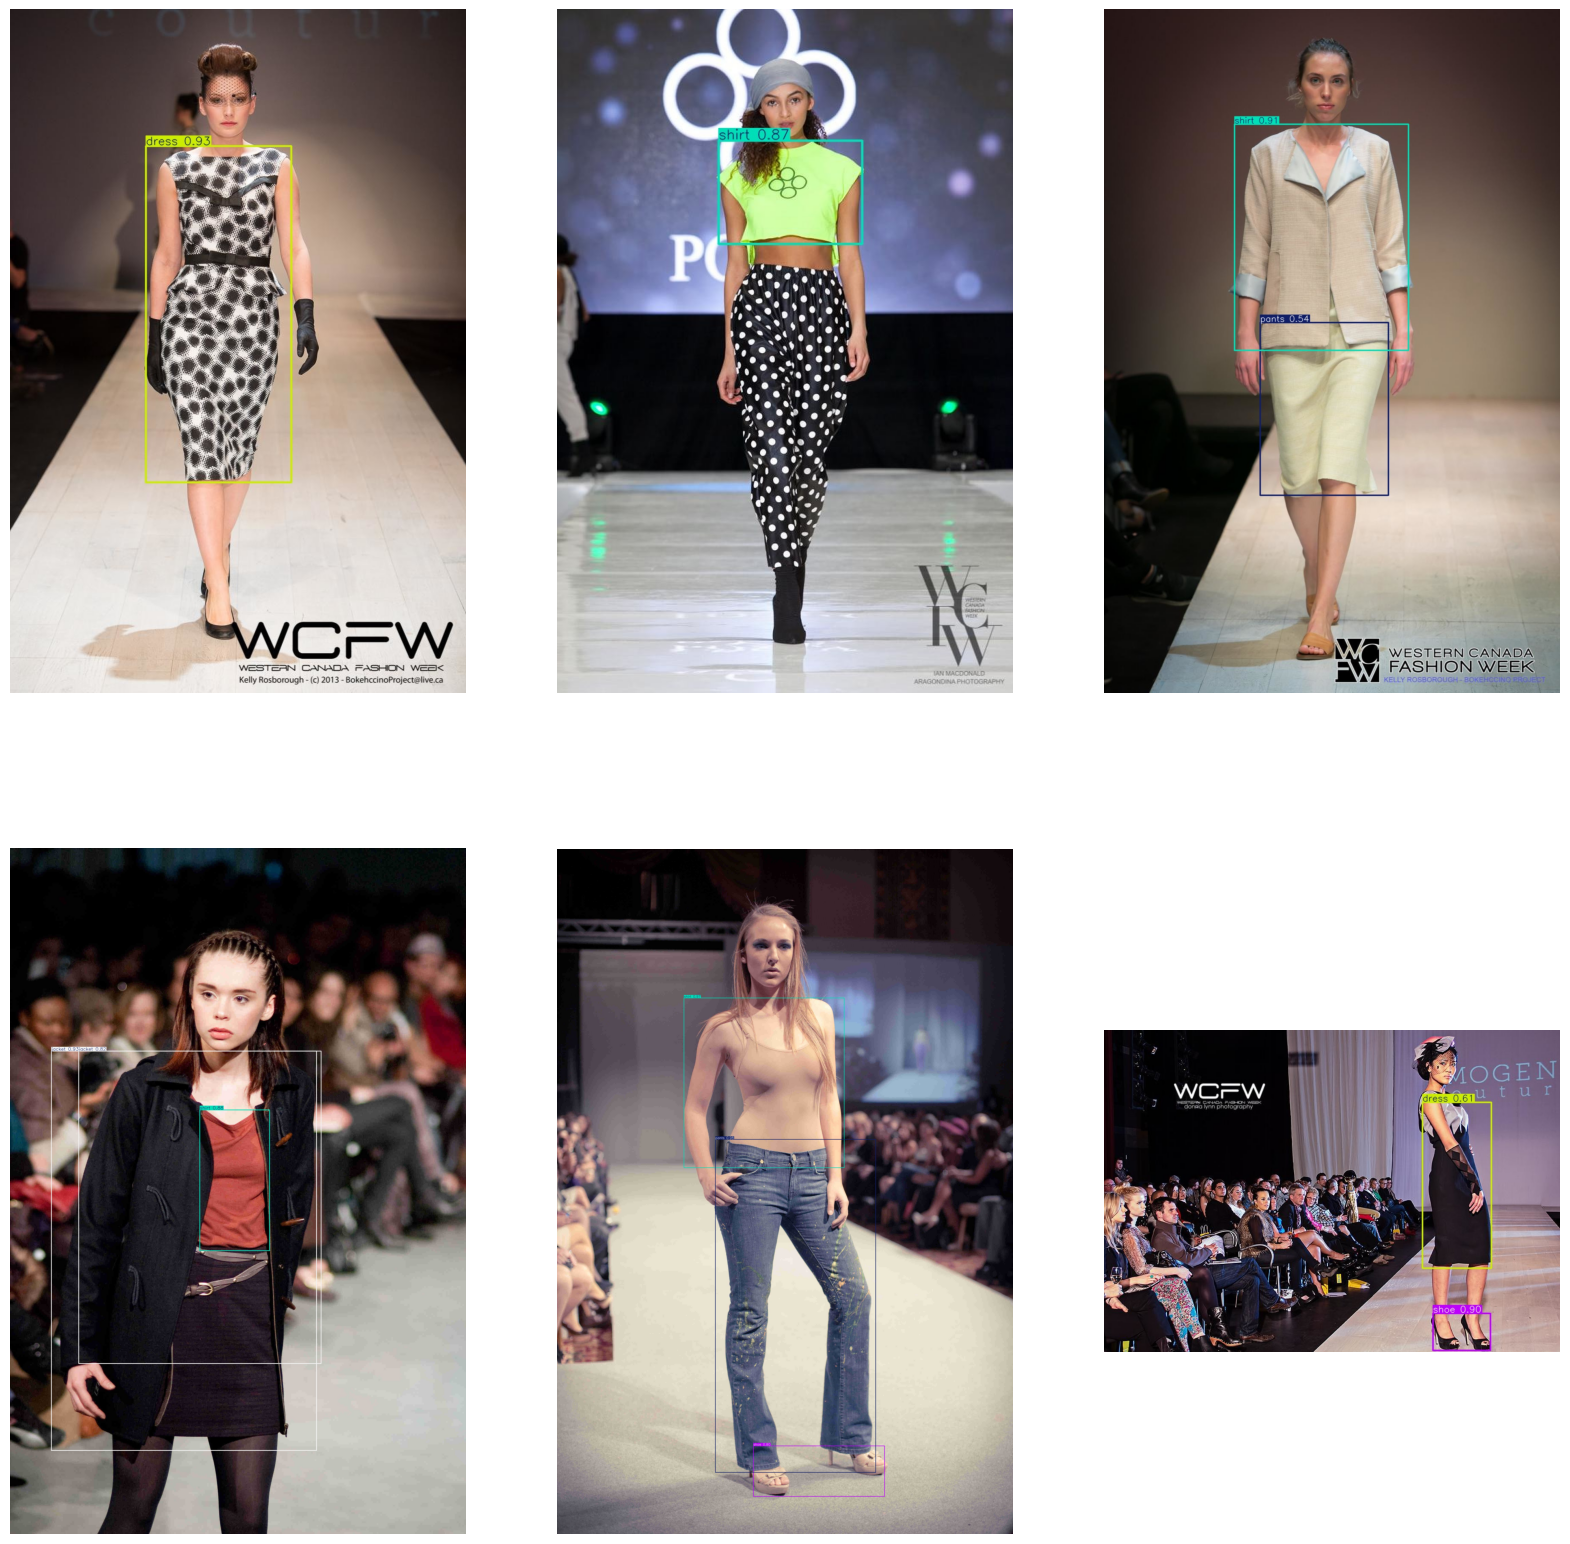

In [56]:
import os
import shutil
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the model


# Define test and output paths
test1_path = "/Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/test1/"
output_dir = '/Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/runs/detect/predicted/'

# Ensure 'predicted' directory exists
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(20, 20))
imgs = os.listdir(test1_path)
c = 1

# Get the initial list of directories in 'detect'
initial_dirs = set(os.listdir('/Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/runs/detect'))

for i, img in enumerate(imgs):
    try:
        # Perform prediction and save results
        result = model.predict(source=os.path.join(test_path, img), conf=0.4, save=True, line_width=2)
        
        # Get the default save directory
        default_dir = result[0].save_dir
        
        # Define the path for the predicted image
        predicted_img_path = os.path.join(default_dir, img)
        
        # Move the predicted image to the output directory
        if os.path.exists(predicted_img_path):
            shutil.move(predicted_img_path, os.path.join(output_dir, img))
            print(f"Moved {img} to {output_dir}")
        else:
            print(f"File {predicted_img_path} not found.")
        
        # Load and display the image
        im = plt.imread(os.path.join(output_dir, img))
        plt.subplot(2, 3, c)
        plt.axis('off')
        plt.imshow(im)
        c += 1
    
    except FileNotFoundError as fnf_error:
        print(f"File not found: {img} - {fnf_error}")
    except Exception as e:
        print(f"Error processing {img}: {e}")

# New directories created after processing the images
new_dirs = set(os.listdir('/Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/runs/detect')) - initial_dirs

# Only delete directories created after the 171st image
for i, new_dir in enumerate(new_dirs):
    if i >= 171:
        dir_path = os.path.join('/Users/omeraysal/Desktop/colorful_fashion_dataset_for_object_detection/runs/detect', new_dir)
        try:
            if os.path.isdir(dir_path):
                shutil.rmtree(dir_path)
                print(f"Deleted empty directory: {new_dir}")
        except Exception as e:
            print(f"Could not delete directory {new_dir}: {e}")

plt.show()


In [20]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from ultralytics import YOLO
import torch
import cv2

# YOLOv8 segmentasyon modelini indir ve yükle
model = YOLO("yolov8x-seg.pt")

# Klasör yolu
folder_path = '/Users/omeraysal/Desktop/imaterialist-fashion-2020-fgvc7/train'

# Tüm jpg dosyalarını al ve ilk 150 tanesini seç
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')][:145]

# IoU değerlerini kaydetmek için bir liste oluştur
iou_results = []

def rle_to_mask(rle_string, height, width):
    rle_numbers = [int(num) for num in rle_string.split()]
    rle_pairs = np.array(rle_numbers).reshape(-1, 2)
    img = np.zeros(height * width, dtype=np.uint8)

    for start, length in rle_pairs:
        start -= 1  # RLE is 1-indexed
        img[start:start + length] = 1

    img = img.reshape((width, height)).T  # Needs to be transposed
    return img

def post_process_mask(mask):
    # Morfolojik işlemler ile maskeyi iyileştirme
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    return mask

# Her bir resim dosyası için işlemleri yap
for i, image_file in enumerate(image_files):
    # ImageId'yi dosya adından çıkar
    image_id = os.path.splitext(image_file)[0]

    # Bu ImageId'ye ait tüm satırları al
    image_rows = df[df['ImageId'] == image_id]

    if not image_rows.empty:
        # Görüntü boyutlarını al
        height = int(image_rows.iloc[0]['Height'])
        width = int(image_rows.iloc[0]['Width'])

        # Boş bir maske oluştur
        combined_mask = np.zeros((height, width), dtype=np.uint8)

        # Her bir EncodedPixels değerini çöz ve birleşik maskeye ekle
        for _, row in image_rows.iterrows():
            encoded_pixels = row['EncodedPixels']
            mask = rle_to_mask(encoded_pixels, height, width)
            combined_mask = np.maximum(combined_mask, mask)

        # Görüntüyü yükle ve YOLO modeline verin
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)

        # YOLO ile segmentasyon işlemi yap
        results = model(image)

        # YOLO'nun maskelerini çıkarın ve orijinal boyutlara yeniden ölçeklendirin
        pred_mask = np.zeros((height, width), dtype=np.uint8)
        for segment in results[0].masks.data:  # YOLOv8 segmentasyon maskelerine erişim
            mask = segment.cpu().numpy()  # Maskeyi numpy formatına çevir
            mask = np.squeeze(mask)  # YOLO'dan dönen maskeyi sıkıştırarak 2D hale getirin

            # Maskeyi orijinal görüntü boyutlarına yeniden ölçeklendirin
            mask_resized = np.array(Image.fromarray(mask).resize((width, height), resample=Image.NEAREST))
            pred_mask = np.maximum(pred_mask, mask_resized)

        # Post-processing uygulayarak maskeyi iyileştirin
        pred_mask = post_process_mask(pred_mask)

        # Intersection over Union (IoU) hesapla
        intersection = np.logical_and(combined_mask, pred_mask).sum()
        union = np.logical_or(combined_mask, pred_mask).sum()
        iou = intersection / union

        # IoU ve ImageId'yi listeye ekle
        iou_results.append({'ImageId': image_id, 'IoU': iou})

        # İşlem tamamlandığında bilgilendirme
        print(f"{i+1}/{len(image_files)} - Resim '{image_id}' işlendi, IoU: {iou:.4f}")

    else:
        print(f"ImageId {image_id} için CSV dosyasında kayıt bulunamadı.")

# IoU sonuçlarını bir DataFrame'e dönüştür
iou_df = pd.DataFrame(iou_results)

# Sonuçları Excel dosyasına kaydet
iou_df.to_excel('/Users/omeraysal/Desktop/imaterialist-fashion-2020-fgvc7/iou_results_145_yolo.xlsx', index=False)

print("IoU sonuçları Excel dosyasına kaydedildi.")



0: 640x448 4 persons, 548.1ms
Speed: 1.8ms preprocess, 548.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)
1/145 - Resim 'bd89b8a9a641bc94dfc04fedbe3a9b9d' işlendi, IoU: 0.4662

0: 640x448 1 person, 1 handbag, 473.5ms
Speed: 1.7ms preprocess, 473.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
2/145 - Resim 'c6a96eef11e40695f268070985a8cc29' işlendi, IoU: 0.8178

0: 640x640 1 person, 732.9ms
Speed: 1.7ms preprocess, 732.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
3/145 - Resim 'fbd547a46c0d33a9c82c0321fa2ff28c' işlendi, IoU: 0.5459

0: 640x448 6 persons, 465.2ms
Speed: 1.0ms preprocess, 465.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)
4/145 - Resim '2093d883b50bb436edd0dc9fa8850a08' işlendi, IoU: 0.4944

0: 640x448 3 persons, 3 cars, 1 bench, 1 potted plant, 463.4ms
Speed: 1.1ms preprocess, 463.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)
5/145 - Resim 'd33fd2151a006efa9e

40/145 - Resim '5068c2e213825361255237124158bfdd' işlendi, IoU: 0.3211

0: 640x448 1 person, 1 tennis racket, 471.1ms
Speed: 1.9ms preprocess, 471.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
41/145 - Resim '8cc8b7daf2bad5553e70399817396d6d' işlendi, IoU: 0.5530

0: 640x448 1 person, 480.3ms
Speed: 1.7ms preprocess, 480.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)
42/145 - Resim 'ce3d5cfd54a265d99b978122b814d833' işlendi, IoU: 0.5973

0: 640x448 1 person, 1 couch, 466.7ms
Speed: 2.4ms preprocess, 466.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
43/145 - Resim '2d5f426c7971e96ce86817a2dd0e09e5' işlendi, IoU: 0.3978

0: 640x448 1 person, 471.8ms
Speed: 1.1ms preprocess, 471.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)
44/145 - Resim '3fe668b00f4f6efa967866bdda12a977' işlendi, IoU: 0.7603

0: 640x448 1 person, 1 tie, 468.5ms
Speed: 1.2ms preprocess, 468.5ms inference, 1.5ms postprocess per imag

80/145 - Resim 'd00e40f5540095ea8cd93141d30c0580' işlendi, IoU: 0.6326

0: 448x640 1 person, 479.0ms
Speed: 1.3ms preprocess, 479.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
81/145 - Resim 'b7adc76152d3da9f47a7c836cafa58a4' işlendi, IoU: 0.7608

0: 640x448 1 person, 1 chair, 481.0ms
Speed: 1.9ms preprocess, 481.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
82/145 - Resim 'd7874e2cc97db79d8533f0ac185be743' işlendi, IoU: 0.5440

0: 640x448 9 persons, 1 handbag, 461.0ms
Speed: 1.2ms preprocess, 461.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 448)
83/145 - Resim '90d7c20a13626f9c29cc7ea1e5cde3b3' işlendi, IoU: 0.1766

0: 640x448 1 person, 462.2ms
Speed: 1.1ms preprocess, 462.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)
84/145 - Resim 'a47421bca38a1e4bd1f69854b37f9ea6' işlendi, IoU: 0.4656

0: 640x448 1 person, 464.9ms
Speed: 1.0ms preprocess, 464.9ms inference, 0.8ms postprocess per image at shape (

120/145 - Resim '6cf45892e0a4cf339c8dbe2a5ee3f277' işlendi, IoU: 0.3244

0: 640x416 1 person, 442.1ms
Speed: 1.2ms preprocess, 442.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 416)
121/145 - Resim '7724fee6f9f623b57e39379649f89753' işlendi, IoU: 0.7902

0: 640x448 1 person, 467.8ms
Speed: 1.1ms preprocess, 467.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)
122/145 - Resim '50bd11eba0006b17a762f73b67e97804' işlendi, IoU: 0.7556

0: 640x448 1 person, 1 couch, 1 bed, 466.1ms
Speed: 1.2ms preprocess, 466.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)
123/145 - Resim '143bed93dc182847e401264bb0743034' işlendi, IoU: 0.2328

0: 640x448 1 person, 468.2ms
Speed: 1.6ms preprocess, 468.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)
124/145 - Resim 'db14653bd78ddbd63631ea0318b472c1' işlendi, IoU: 0.3742

0: 640x448 1 person, 1 tie, 461.6ms
Speed: 1.5ms preprocess, 461.6ms inference, 1.0ms postprocess per image at 

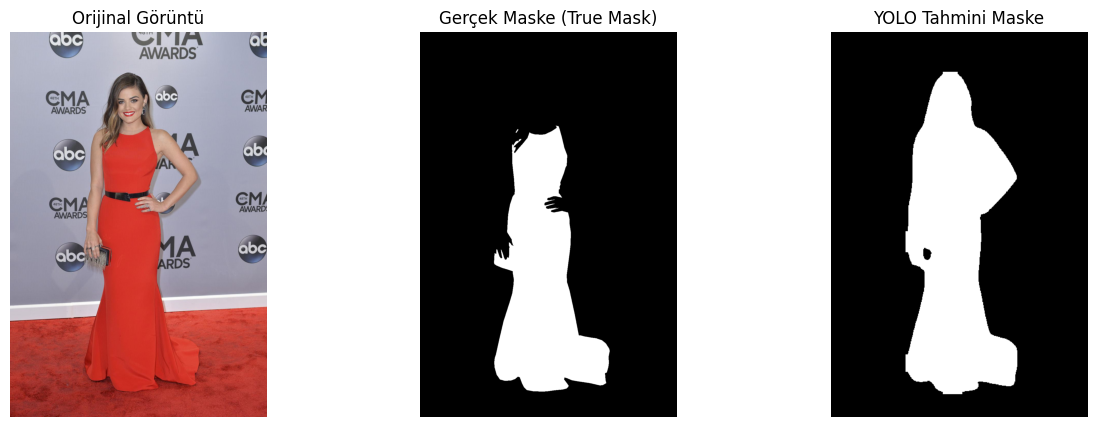

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Orijinal Görüntü
axs[0].imshow(image)
axs[0].set_title("Orijinal Görüntü")
axs[0].axis('off')

# Gerçek Maske (True Mask)
axs[1].imshow(combined_mask, cmap='gray')
axs[1].set_title("Gerçek Maske (True Mask)")
axs[1].axis('off')

# YOLO Tahmini Maske
axs[2].imshow(pred_mask, cmap='gray')
axs[2].set_title("YOLO Tahmini Maske")
axs[2].axis('off')

# Grafikleri göster
plt.show()